### Verileri inceleyin ve gerekli tüm verileri temizleyin.
### Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.
### Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [31]:
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


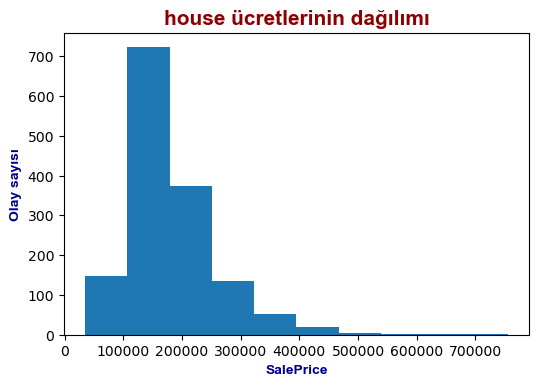

In [32]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(house.SalePrice)
plt.title("house ücretlerinin dağılımı", fontdict = baslik_font)
plt.xlabel("SalePrice", fontdict=eksen_font)
plt.ylabel("Olay sayısı", fontdict=eksen_font)
plt.show()

In [33]:
KitchenQual_type = {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["KitchenQual_type"] = house["KitchenQual"].map(KitchenQual_type)

In [34]:
price_corr = house.corr().SalePrice.abs().sort_values(ascending=False).index[0:11]
house[price_corr].corr().SalePrice

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
KitchenQual_type    0.659600
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
Name: SalePrice, dtype: float64

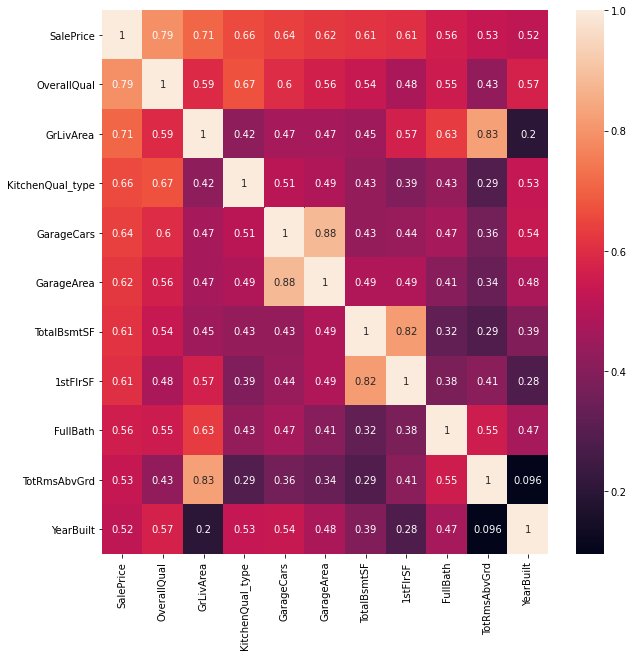

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(house[price_corr].corr(),annot=True)
plt.show()

category variable:

MSZoning: Satışın genel bölgeleme sınıflandırmasını belirtir.

Neighborhood: Ames şehir sınırları içindeki fiziksel konumlar

Condition1: Çeşitli koşullara yakınlık

RoofStyle: Type of roof

Exterior1st: Exterior covering on house

Heating: Type of heating

KitchenQual: Kitchen quality

SaleType: Type of sale



continuous variable:

OverallQual: GeneralQual: Evin genel malzemesini ve bitişini derecelendirir

GrLivArea: Zemin üstü yaşam alanı fit kare

GarageCars: Araba kapasitesindeki garaj boyutu

GarageArea: Fit kare cinsinden garaj boyutu

TotalBsmtSF: Bodrum alanının toplam fit kare

1stFlrSF: Birinci Kat fit kare

FullBath: Tam donanımlı banyolar

TotRmsAbvGrd: Sınıfın üzerindeki toplam oda sayısı (banyolar dahil değildir)

YearBuilt: Orijinal yapım tarihi

YearRemodAdd: Tadilat tarihi (tadilat veya ekleme yoksa inşaat tarihiyle aynıdır)


In [37]:
#hepsinde MSZoning_RL=1 ,Condition1_Norm =1 ,RoofStyle_Gable = 1,Heating_GasA=1,SaleType_WD=1 old için ve anlamlı 
# değişiklik olmadığı için çıkardım

house1 = house[["Neighborhood","Exterior1st","KitchenQual_type","OverallQual","GrLivArea",
                "GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","SalePrice"]]
house1.head()

,Neighborhood,Exterior1st,KitchenQual_type,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
0,CollgCr,VinylSd,3,7,1710,2,548,856,856,2,8,2003,208500
1,Veenker,MetalSd,2,6,1262,2,460,1262,1262,2,6,1976,181500
2,CollgCr,VinylSd,3,7,1786,2,608,920,920,2,6,2001,223500
3,Crawfor,Wd Sdng,3,7,1717,3,642,756,961,1,7,1915,140000
4,NoRidge,VinylSd,3,8,2198,3,836,1145,1145,2,9,2000,250000


In [38]:
house1 = pd.concat([house1,pd.get_dummies(house1[["Neighborhood","Exterior1st"]])],axis=1).drop(
    columns=["Neighborhood","Exterior1st"],axis=1)

In [39]:
y = house1['SalePrice']
x = house1.drop("SalePrice",axis=1)

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
feature_select = SequentialFeatureSelector(LinearRegression(),
                                          k_features = 20,
                                          floating = True,
                                          forward = True,
                                          scoring = "r2",
                                          cv = 0)
feature_select.fit(x,y)
list(feature_select.k_feature_names_)

['KitchenQual_type',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'YearBuilt',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd']

In [41]:
house_x = house1[list(feature_select.k_feature_names_)]
house_y = house1["SalePrice"]

import statsmodels.api as sm
house_x = sm.add_constant(house_x)
results = sm.OLS(house_y,house_x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     322.4
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:33:14   Log-Likelihood:                -17302.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1439   BIC:                         3.476e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.468e+05   9.76e+04     -5.603      0.000   -7.38e+05   -3.55e+05
KitchenQual_type      1.531e+04   1947.834      7.858      0.000    1.15e+04    1.91e+04
OverallQual           1.348e+04   1158.281     11.636      0.000    1.12e+04    1.57e+04
GrLivArea               45.3071      2.393     18.933      0.000      40.613      50.001
GarageCars            1.182e+04   1663.497      7.107      0.000    8559.346    1.51e+04
TotalBsmtSF             21.3969      2.593      8.250      0.000      16.309      26.484
YearBuilt              247.3338     51.009      4.849      0.000     147.275     347.393
Neighborhood_Blmngtn -1.866e+04   8501.762     -2.195      0.028   -3.53e+04   -1987.679
Neighborhood_BrDale  -2.418e+04   8751.574     -2.763      0.006   -4.14e+04   -7016.595
Neighborhood_BrkSide  1.023e+04   4965.652      2.061      0.040     491.715       2e+04
Neighborhood_ClearCr  2.524e+04   6623.432      3.811      0.000    1.23e+04    3.82e+04
Neighborhood_Crawfor  2.908e+04   5240.895      5.548      0.000    1.88e+04    3.94e+04
Neighborhood_MeadowV -2.511e+04   1.02e+04     -2.463      0.014   -4.51e+04   -5108.097
Neighborhood_NoRidge  5.795e+04   5888.011      9.843      0.000    4.64e+04    6.95e+04
Neighborhood_NridgHt  4.793e+04   4569.711     10.490      0.000     3.9e+04    5.69e+04
Neighborhood_OldTown -9705.9141   4107.066     -2.363      0.018   -1.78e+04   -1649.437
Neighborhood_StoneBr  5.086e+04   7253.367      7.012      0.000    3.66e+04    6.51e+04
Neighborhood_Timber   1.918e+04   5778.604      3.319      0.001    7841.098    3.05e+04
Neighborhood_Veenker  3.485e+04   1.05e+04      3.328      0.001    1.43e+04    5.54e+04
Exterior1st_BrkFace   1.425e+04   5036.499      2.829      0.005    4366.346    2.41e+04
Exterior1st_CemntBd   1.666e+04   5526.725      3.015      0.003    5819.427    2.75e+04
==============================================================================
Omnibus:                      407.884   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38317.502
Skew:                          -0.058   Prob(JB):                         0.00
Kurtosis:                      28.097   Cond. No.                     2.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""